In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
training_data = pd.read_csv("heart_failure_clinical_records_dataset.csv")


In [ ]:
training_data.shape

(299, 13)

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
deaths = training_data[training_data['DEATH_EVENT'] > 0]
alive = training_data[training_data['DEATH_EVENT'] < 1]

In [ ]:
for col in deaths.columns:
    print(col)

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


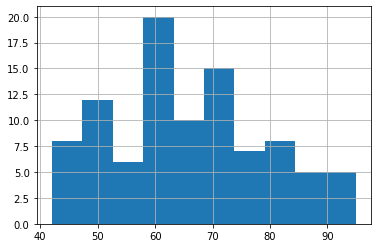

In [ ]:
deaths['age'].hist()

In [ ]:
creatinine_phosphokinase = deaths.groupby(deaths['creatinine_phosphokinase'])
creatinine_phosphokinase = deaths[["creatinine_phosphokinase", "DEATH_EVENT"]]
creatinine_phosphokinase = creatinine_phosphokinase.sort_values(by=['creatinine_phosphokinase'])


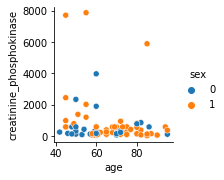

In [ ]:
sns.pairplot(deaths,x_vars=['age'],y_vars=['creatinine_phosphokinase'],hue='sex')

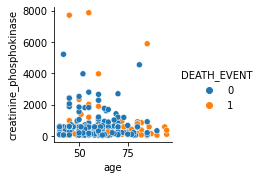

In [ ]:
sns.pairplot(training_data,x_vars=['age'],y_vars=['creatinine_phosphokinase'],hue='DEATH_EVENT')

In [ ]:
training_data.corr()
# serum_creatinine
# ejection_fraction
# serum_sodium

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
print(training_data['ejection_fraction'].mean())
print(deaths['ejection_fraction'].mean())
print(alive['ejection_fraction'].mean())

38.08361204013378
33.46875
40.26600985221675


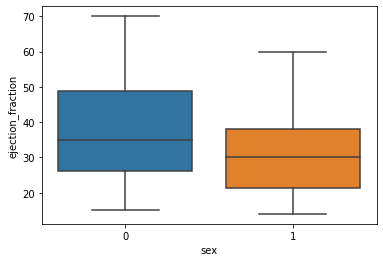

In [ ]:
sns.boxplot(y='ejection_fraction',x='sex',data=deaths)

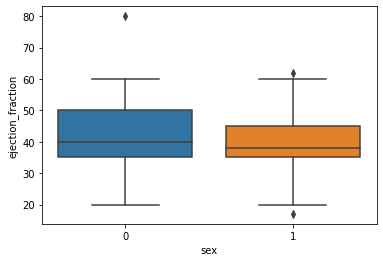

In [ ]:
sns.boxplot(y='ejection_fraction',x='sex',data=alive)

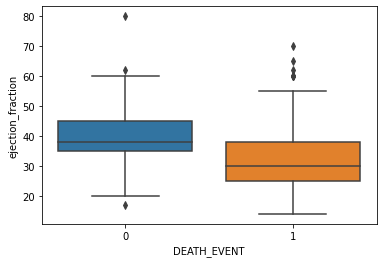

In [ ]:
sns.boxplot(y='ejection_fraction',x='DEATH_EVENT',data=training_data)

In [ ]:
from sklearn.model_selection import train_test_split

X = training_data[['age', 'serum_creatinine','DEATH_EVENT']]
Y = training_data['ejection_fraction']



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(179, 3)
(120, 3)
(179,)
(120,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept
print(model.intercept_)

31.175482476192684


In [ ]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
age,0.125730
serum_creatinine,1.398826
DEATH_EVENT,-8.162589


In [ ]:
# A positive sign indicates that as the predictor variable increases, the Target variable also increases.
# A negative sign indicates that as the predictor variable increases, the Target variable decreases.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


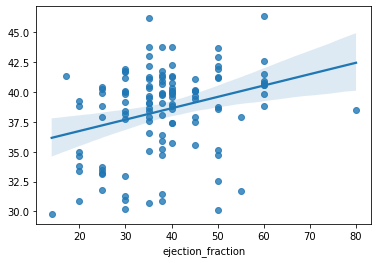

In [ ]:
predictions = model.predict(X_test)
sns.regplot(y_test,predictions)


In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

# TRYING NEW CODE FROM HERE

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:      ejection_fraction   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.839
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           0.000799
Time:                        16:08:22   Log-Likelihood:                -693.40
No. Observations:                 179   AIC:                             1395.
Df Residuals:                     175   BIC:                             1408.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.1755      4.803  

In [ ]:
# WRITE A CONFUSION MATRIX

In [ ]:
# splitting in training and testing
from sklearn import metrics

X = training_data.iloc[:, :-1].values
y = training_data.iloc[:, -1].values


[[46  2]
 [ 5 22]]
Accuracy Score : 0.9066666666666666
